#Drive Mount


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Imports

In [ ]:
#Importing important files....
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sn#Importing important files....
import io
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from xgboost import XGBRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from statistics import mean
from sklearn import tree
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Dataset

In [ ]:
#Uploading dataset...
df = pd.read_csv('/content/drive/MyDrive/Research Work/Parkinson Disease/DATASET.csv')


In [ ]:
_#Defining features(X) and labels(Y)....
X= df.drop(['Status','Recording','ID'],axis =1).values
y= df['Status'].values



#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
X_Scale = StandardScaler().fit_transform(X)

Scaled_feature_X = pd.DataFrame(X)

#Train & Test dataset Splitting

In [ ]:
#Train and test data set split.....
X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.2, random_state=101)

### Train & Test View

In [ ]:
#Preview of Train and test data....
print("Train Dataset:")

print("Training features: ")
print(" ")
print(X_train)
print(" ")

print("Training labels: ")
print(" ")
print(y_train)
print(" ")
print(" ")


print("Test Dataset:")

print("Testing features: ")
print(" ")
print(X_train)
print(" ")

print("Testing labels: ")
print(" ")
print(y_test)
print(" ")

Train Dataset:
Training features: 
 
[[-0.81649658 -0.13150045  0.10004933 ... -0.23937863 -0.2942453
  -0.67000574]
 [-0.81649658  2.41823576  1.98463502 ... -0.70398664 -0.03332617
  -0.58723566]
 [-0.81649658 -0.10531516 -0.25469621 ... -1.23729321 -1.0045762
  -0.67066076]
 ...
 [ 1.22474487 -0.81469329 -0.80898612 ...  0.05833295  0.10977646
   2.09599868]
 [ 1.22474487  0.85609635  0.83171201 ...  0.9393249   1.87216426
   0.63532899]
 [ 1.22474487 -0.47093658 -0.40989739 ...  2.93207524  1.73969638
   2.7074035 ]]
 
Training labels: 
 
[0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1
 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1
 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 0]
 
 
Test Dataset:
Testing features: 
 
[[-0.81649658 -0.1315

In [ ]:
X_test.shape

(48, 45)



---



# _______________________________________________

---



#Defining Model

In [ ]:
#Definimng model
model_name = "GB_Min-Sample-Split"
model = GradientBoostingClassifier(min_samples_split=10)

### Define Save Directory

In [ ]:
save_directory = '/content/drive/MyDrive/Research Work/Research work 2/Without feature selection/Normal/GB_Min-Sample-Split/'

### Model Training

In [ ]:
import time
t0=time.time()
history = model.fit(X_train, y_train)
print ("training time:", round(time.time()-t0, 3), "s") # the time would be round to 3 decimal in seconds
t1=time.time()
y_predicted = model.predict(X_test)


training time: 0.47 s


In [ ]:
prediction_time = (round(time.time()-t1, 5))/48
print(prediction_time)

0.00040625


In [ ]:
#Prediction
y_predicted = model.predict(X_test)

In [ ]:
#Model score
test_accuracy = model.score(X_test,y_test)

In [ ]:
train_accuracy = model.score(X_train, y_train)

# Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_predicted)

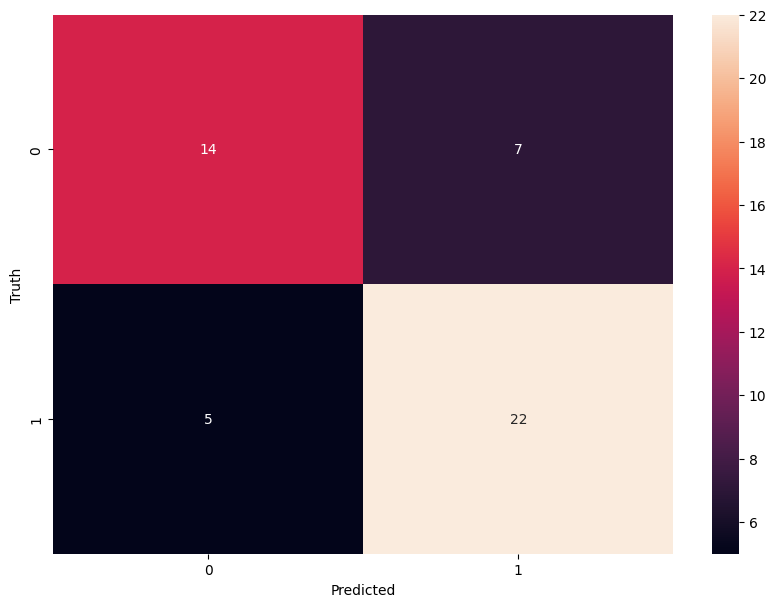

In [ ]:
%matplotlib inline
#Your code to generate the heatmap and plot it
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Define the directory path where you want to save the PNG file


# Define the PNG file name
png_filename = "CM_" + model_name + '.png'

# Save the PNG file to the specified directory
plt.savefig(save_directory + png_filename)

# Display the plot if you want to show it in your Colab notebook
plt.show()

# Model Performance

### Model Error

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('VarScore:',metrics.explained_variance_score(y_test,y_predicted))

MAE: 0.25
MSE: 0.25
RMSE: 0.5
VarScore: -0.008818342151675651


### Console Output

In [ ]:
#Precision,recall,f1_score,cohen_kappa_score,auc.......
print("Precision,recall,f1 score,cohen kappa score,auc.....")
print(" ")

# precision tp / (tp + fp)
precision = precision_score(y_test, y_predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predicted)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,  y_predicted)
print('ROC AUC: %f' % auc)
#Cohen's kappa
kappa=cohen_kappa_score(y_test,  y_predicted)
print('Cohen Kappa: %f' % kappa)
print(" ")

Precision,recall,f1 score,cohen kappa score,auc.....
 
Precision: 0.758621
Recall: 0.814815
F1 score: 0.785714
ROC AUC: 0.740741
Cohen Kappa: 0.486631
 


### CSV output

In [ ]:
import csv
import os

# Define the directory path where you want to save the CSV file
save_directory_csv = '/content/drive/MyDrive/Research Work/Research work 2/Without feature selection/Normal/'

# Define the CSV file name
csv_filename = "metrics_all_models.csv"

# Define the model name
#model_name = "LR(Normal)"  # Replace with the actual model name

# Create a list to store the metric values
metrics_data = [
    ["Model name", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 score", "ROC AUC", "Cohen Kappa","Prediction Time"],
    [model_name, train_accuracy, test_accuracy, precision, recall, f1, auc, kappa, prediction_time]
]

# Check if the CSV file already exists
csv_exists = os.path.isfile(save_directory_csv + csv_filename)

# If the CSV file exists, read its content to check for an existing model name
existing_data = {}
header = ["Model name", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 score", "ROC AUC", "Cohen Kappa", "Prediction Time"]  # Default header
if csv_exists:
    with open(save_directory_csv + csv_filename, mode='r') as file:
        reader = csv.reader(file)
        if header == next(reader):  # Check if the header matches the default header
            for row in reader:
                existing_model_name = row[0]
                existing_data[existing_model_name] = row[1:]

# Append a new row for the new model name or update existing row
existing_data[model_name] = metrics_data[1][1:]

# Write the data back to the CSV file
with open(save_directory_csv + csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)  # Write the header row
    for model, metrics in existing_data.items():
        writer.writerow([model] + metrics)

# Print a message to confirm that the metrics have been saved or updated
print(f"Metrics saved or updated in {save_directory_csv + csv_filename}")


Metrics saved or updated in /content/drive/MyDrive/Research Work/Research work 2/Without feature selection/Normal/metrics_all_models.csv


# Model Storing

In [ ]:
import pickle

# Save the model to the specified directory
with open(save_directory + "model_" + model_name + ".pkl", "wb") as file:
    pickle.dump(model, file)
